<a href="https://colab.research.google.com/github/francillco34/Entregas/blob/main/Clase5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install altair

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


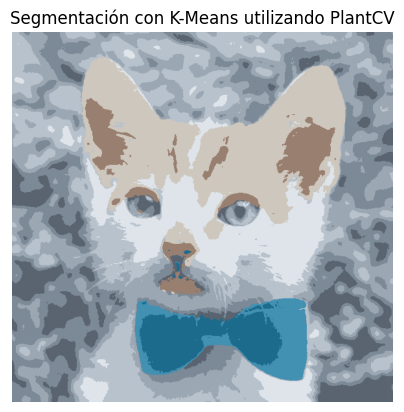

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import cv2
import plantcv as pcv

def kmeans_segmentation(image_path, n_clusters=3):
    # Paso 1: Leer la imagen y convertirla a espacio de color HSV
    img_rgb = cv2.imread(image_path)
    img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2HSV)

    # Paso 2: Desenvolver píxeles de imagen a lista de flotantes
    img_flat = img_hsv.reshape((-1, 3))
    img_flat = np.float32(img_flat)

    # Paso 3: Definir K
    kmeans = KMeans(n_clusters=n_clusters)

    # Paso 4: Encontrar los centros en el espacio HSV
    kmeans.fit(img_flat)
    centers = np.uint8(kmeans.cluster_centers_)

    # Paso 5: Segmentar cada píxel de la imagen y reemplazarlo por su centro
    segmented_image = centers[kmeans.labels_].reshape(img_hsv.shape)

    # Convertir la imagen de vuelta a RGB
    segmented_image_rgb = cv2.cvtColor(segmented_image, cv2.COLOR_HSV2RGB)

    return segmented_image_rgb, centers

# Ruta de la imagen a segmentar
image_path = '/content/cat4.png'

# Número de clusters
n_clusters = 9

# Segmentar la imagen
segmented_image, cluster_centers = kmeans_segmentation(image_path, n_clusters)

# Visualizar la imagen segmentada
plt.imshow(segmented_image)
plt.axis('off')
plt.title('Segmentación con K-Means utilizando PlantCV')
plt.show()

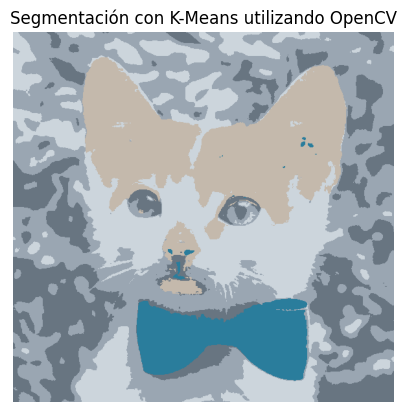

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def kmeans_segmentation_opencv(image_path, n_clusters=3):
    # Paso 1: Leer la imagen y convertirla a espacio de color HSV
    img_rgb = cv2.imread(image_path)
    img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2HSV)

    # Paso 2: Desenvolver píxeles de imagen a lista de flotantes
    img_flat = img_hsv.reshape((-1, 3))
    img_flat = np.float32(img_flat)

    # Paso 3: Definir los criterios de parada para cv.kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

    # Paso 4: Aplicar K-Means
    _, labels, centers = cv2.kmeans(img_flat, n_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convertir los centros de los clusters a tipo de datos uint8
    centers = np.uint8(centers)

    # Paso 5: Segmentar cada píxel de la imagen y reemplazarlo por su centro
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(img_hsv.shape)

    # Convertir la imagen de vuelta a RGB
    segmented_image_rgb = cv2.cvtColor(segmented_image, cv2.COLOR_HSV2RGB)

    return segmented_image_rgb, centers

# Ruta de la imagen a segmentar
image_path = '/content/cat4.png'

# Número de clusters
n_clusters = 5

# Segmentar la imagen
segmented_image, cluster_centers = kmeans_segmentation_opencv(image_path, n_clusters)

# Visualizar la imagen segmentada
plt.imshow(segmented_image)
plt.axis('off')
plt.title('Segmentación con K-Means utilizando OpenCV')
plt.show()
